In [121]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
class SimpleNN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.sigmoid(output)  # Applying sigmoid on the final output
        output = output * self.w20
        return output


In [123]:
my_model = SimpleNN()

In [124]:
X = torch.linspace(start=1, end=2.5, steps=40)
X

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [125]:
Y = my_model(X)
Y

tensor([-0.3884, -0.3885, -0.3886, -0.3887, -0.3888, -0.3889, -0.3890, -0.3891,
        -0.3891, -0.3892, -0.3893, -0.3894, -0.3894, -0.3895, -0.3896, -0.3896,
        -0.3897, -0.3898, -0.3898, -0.3899, -0.3900, -0.3900, -0.3901, -0.3901,
        -0.3902, -0.3902, -0.3903, -0.3903, -0.3904, -0.3904, -0.3905, -0.3905,
        -0.3905, -0.3906, -0.3906, -0.3907, -0.3907, -0.3908, -0.3908, -0.3908])

Text(0, 0.5, 'Y')

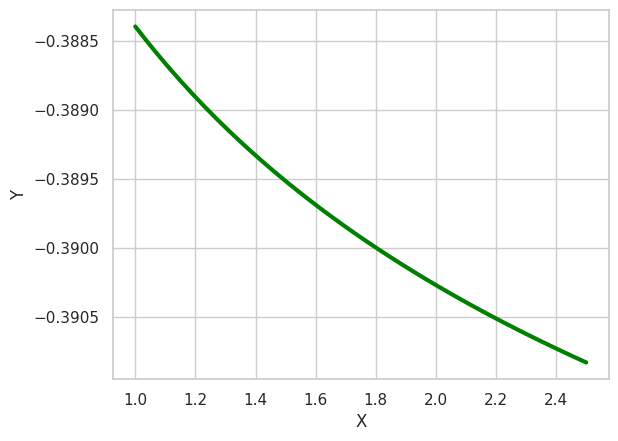

In [126]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=Y,
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [127]:
class Simple2NN(nn.Module):
    def __init__(self):
        super().__init__()
        # Initialize weights and biases with random values between -1 and 2
        self.w00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b00 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2
        self.b02 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w11 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=False)

        self.w20 = nn.Parameter(torch.rand(1) * 3 - 1, requires_grad=True)  # Random between -1 and 2

    def forward(self, input):
        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = torch.sigmoid(input_to_layer_01)  # Using sigmoid activation
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = torch.sigmoid(input_to_layer_02)  # Using sigmoid activation
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = torch.sigmoid(input_to_layer_03)  # Using sigmoid activation
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = torch.sigmoid(output)  # Applying sigmoid on the final output
        output = output * self.w20
        return output

In [128]:
simple2NN = Simple2NN()

In [129]:
newY=simple2NN(X)

In [130]:
newY

tensor([1.3829, 1.3846, 1.3863, 1.3879, 1.3895, 1.3909, 1.3924, 1.3937, 1.3950,
        1.3963, 1.3975, 1.3987, 1.3998, 1.4009, 1.4019, 1.4029, 1.4038, 1.4047,
        1.4056, 1.4064, 1.4072, 1.4080, 1.4088, 1.4095, 1.4101, 1.4108, 1.4114,
        1.4120, 1.4126, 1.4131, 1.4137, 1.4142, 1.4146, 1.4151, 1.4156, 1.4160,
        1.4164, 1.4168, 1.4171, 1.4175], grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

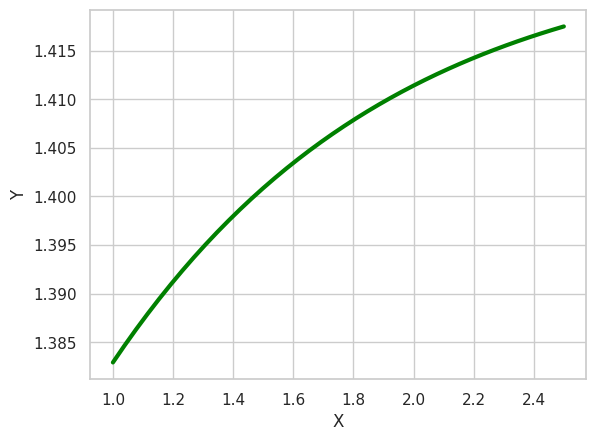

In [131]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=newY.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')

In [132]:
optimizer = SGD(simple2NN.parameters(), lr=0.01)
loss = nn.MSELoss()

In [133]:
for epoch in range(100):
    total_loss = 0

    for i in range(len(X)):
        input_i = X[i]
        actual_output_i = Y[i]

        pred_output_i = simple2NN(input_i)

        loss_value = loss(pred_output_i, actual_output_i)

        loss_value.backward()

        total_loss += loss_value

    print('Epoch: ', epoch, ' | Total Loss: ', total_loss)
    optimizer.step()
    optimizer.zero_grad()



/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch:  0  | Total Loss:  tensor(128.7962, grad_fn=<AddBackward0>)
Epoch:  1  | Total Loss:  tensor(11.6981, grad_fn=<AddBackward0>)
Epoch:  2  | Total Loss:  tensor(1.0628, grad_fn=<AddBackward0>)
Epoch:  3  | Total Loss:  tensor(0.0967, grad_fn=<AddBackward0>)
Epoch:  4  | Total Loss:  tensor(0.0089, grad_fn=<AddBackward0>)
Epoch:  5  | Total Loss:  tensor(0.0010, grad_fn=<AddBackward0>)
Epoch:  6  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  7  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  8  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  9  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  10  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  11  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  12  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  13  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  14  | Total Loss:  tensor(0.0002, grad_fn=<AddBackward0>)
Epoch:  15  | Tot

In [134]:
pred_y = simple2NN(X)
pred_y

tensor([-0.3838, -0.3843, -0.3847, -0.3852, -0.3856, -0.3860, -0.3864, -0.3868,
        -0.3872, -0.3875, -0.3878, -0.3882, -0.3885, -0.3888, -0.3891, -0.3893,
        -0.3896, -0.3899, -0.3901, -0.3903, -0.3905, -0.3908, -0.3910, -0.3912,
        -0.3914, -0.3915, -0.3917, -0.3919, -0.3920, -0.3922, -0.3923, -0.3925,
        -0.3926, -0.3927, -0.3929, -0.3930, -0.3931, -0.3932, -0.3933, -0.3934],
       grad_fn=<MulBackward0>)

Text(0, 0.5, 'Y')

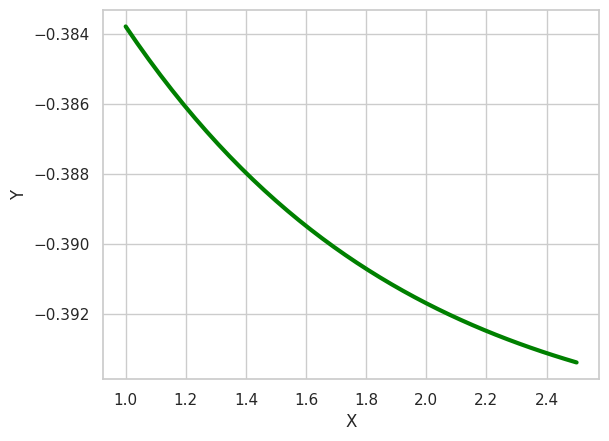

In [135]:
sns.set(style="whitegrid")

sns.lineplot(
    x=X,
    y=pred_y.detach(),
    color='green',
    linewidth=3
)


plt.xlabel('X')
plt.ylabel('Y')